In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback
import tensorflow.keras.backend as K
from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential # to see the sequence like ip --> hl1 --> hl2--> hl3 -->o/p #to build layer by layer architecture
from keras.layers import Dense # to decide the depth of layers
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError
from keras.models import load_model

/Users/saro/Desktop/dvdrentaldl/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
df = pd.read_csv('dvd rental final csv.csv')

In [3]:
df

,inventory_id,film_id,title,rental_duration,rental_rate,length,replacement_cost,rating,category,language,store_id,rental_id,rental_date,customer_id,return_date,amount,active
0,3419,749,Rules Human,6,4.99,153,19.99,R,Horror,English,1,1520,2005-06-15 23:57:20,341,2005-06-24 23:46:20,7.99,1
1,2512,552,Majestic Floats,5,0.99,130,15.99,PG,Documentary,English,2,1778,2005-06-16 18:54:48,341,2005-06-22 16:08:48,1.99,1
2,2507,551,Maiden Home,3,4.99,138,9.99,PG,New,English,1,1849,2005-06-17 00:13:19,341,2005-06-23 18:37:19,7.99,1
3,2047,445,Hyde Doctor,5,2.99,100,11.99,G,Classics,English,1,2829,2005-06-19 21:11:30,341,2005-06-24 18:10:30,2.99,1
4,2569,563,Massacre Usual,6,4.99,165,16.99,R,Games,English,1,3130,2005-06-20 19:03:22,341,2005-06-29 18:05:22,7.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14591,1148,254,Driver Annie,4,2.99,159,11.99,PG-13,Sports,English,1,12682,2006-02-14 15:16:03,245,NaN,2.99,1
14592,3998,870,Swarm Gold,4,0.99,123,12.99,PG-13,Horror,English,2,14107,2006-02-14 15:16:03,251,NaN,0.99,1
14593,1146,253,Drifter Commandments,5,4.99,61,18.99,PG-13,Action,English,2,13756,2006-02-14 15:16:03,252,NaN,4.99,1
14594,1219,270,Earth Vision,7,0.99,85,29.99,NC-17,New,English,2,15293,2006-02-14 15:16:03,263,NaN,0.99,1


In [4]:
df.isnull().sum()

inventory_id          0
film_id               0
title                 0
rental_duration       0
rental_rate           0
length                0
replacement_cost      0
rating                0
category              0
language              0
store_id              0
rental_id             0
rental_date           0
customer_id           0
return_date         183
amount                0
active                0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
# Convert the 'date' column to datetime
df['rental_date'] = pd.to_datetime(df['rental_date'])

# Extract year, month, day, hour, minute, and second
df['rental_year'] = df['rental_date'].dt.year
df['rental_month'] = df['rental_date'].dt.month
df['rental_day'] = df['rental_date'].dt.day
df['rental_hour'] = df['rental_date'].dt.hour
df['rental_minute'] = df['rental_date'].dt.minute

df.drop('rental_date', axis=1, inplace=True)

df.head()

,inventory_id,film_id,title,rental_duration,rental_rate,length,replacement_cost,rating,category,language,...,rental_id,customer_id,return_date,amount,active,rental_year,rental_month,rental_day,rental_hour,rental_minute
0,3419,749,Rules Human,6,4.99,153,19.99,R,Horror,English,...,1520,341,2005-06-24 23:46:20,7.99,1,2005,6,15,23,57
1,2512,552,Majestic Floats,5,0.99,130,15.99,PG,Documentary,English,...,1778,341,2005-06-22 16:08:48,1.99,1,2005,6,16,18,54
2,2507,551,Maiden Home,3,4.99,138,9.99,PG,New,English,...,1849,341,2005-06-23 18:37:19,7.99,1,2005,6,17,0,13
3,2047,445,Hyde Doctor,5,2.99,100,11.99,G,Classics,English,...,2829,341,2005-06-24 18:10:30,2.99,1,2005,6,19,21,11
4,2569,563,Massacre Usual,6,4.99,165,16.99,R,Games,English,...,3130,341,2005-06-29 18:05:22,7.99,1,2005,6,20,19,3


In [7]:
df['return_date'] = pd.to_datetime(df['return_date'])

# Extract year, month, day, hour, minute, and second
df['return_year'] = df['return_date'].dt.year
df['return_month'] = df['return_date'].dt.month
df['return_day'] = df['return_date'].dt.day
df['return_hour'] = df['return_date'].dt.hour
df['return_minute'] = df['return_date'].dt.minute

df.drop('return_date', axis=1, inplace=True)

In [8]:
df.isnull().sum()

inventory_id        0
film_id             0
title               0
rental_duration     0
rental_rate         0
length              0
replacement_cost    0
rating              0
category            0
language            0
store_id            0
rental_id           0
customer_id         0
amount              0
active              0
rental_year         0
rental_month        0
rental_day          0
rental_hour         0
rental_minute       0
return_year         0
return_month        0
return_day          0
return_hour         0
return_minute       0
dtype: int64

In [9]:
df.drop('language',axis=1, inplace=True)
df.drop('rental_year',axis=1, inplace=True)
df.drop('return_year',axis=1, inplace=True)
df.drop('rental_hour',axis=1, inplace=True)
df.drop('rental_minute',axis=1, inplace=True)
df.drop('return_hour',axis=1, inplace=True)
df.drop('return_minute',axis=1, inplace=True)
df.drop('title',axis=1,inplace=True)
df.drop(['inventory_id','film_id','store_id','rental_id','customer_id'], axis=1, inplace=True)

In [10]:
categorical_column_to_iterate = ['rating', 'category']
continuous_column_to_iterate = ['rental_rate', 'replacement_cost']

In [11]:
df['rating'].value_counts()

rating
PG-13    3203
NC-17    2964
PG       2903
R        2868
G        2475
Name: count, dtype: int64

In [12]:
df['rating'] = df['rating'].map({"PG-13":0,'NC-17':1,'PG':2,'R':3,"G":4})

In [13]:
df['rating'].value_counts()

rating
0    3203
1    2964
2    2903
3    2868
4    2475
Name: count, dtype: int64

In [14]:
df['category'].value_counts()

category
Sports         1066
Animation      1044
Action          996
Sci-Fi          990
Family          975
Drama           946
Foreign         942
Documentary     930
Games           870
Children        855
New             851
Classics        851
Comedy          842
Horror          761
Travel          755
Music           739
Name: count, dtype: int64

In [15]:
df['category'].unique()

array(['Horror', 'Documentary', 'New', 'Classics', 'Games', 'Sci-Fi',
       'Foreign', 'Family', 'Travel', 'Music', 'Sports', 'Comedy',
       'Drama', 'Action', 'Children', 'Animation'], dtype=object)

In [16]:
df['category'] = df['category'].map({'Horror':0, 'Documentary':1, 'New':2, 'Classics':3, 'Games':4, 'Sci-Fi':5,
       'Foreign':6, 'Family':7, 'Travel':8, 'Music':9, 'Sports':10, 'Comedy':11,
       'Drama':12, 'Action':13, 'Children':14, 'Animation':15})

In [17]:
df['category'].value_counts()

category
10    1066
15    1044
13     996
5      990
7      975
12     946
6      942
1      930
4      870
14     855
2      851
3      851
11     842
0      761
8      755
9      739
Name: count, dtype: int64

In [18]:
#encoding
encoders_cont = {}
for col in continuous_column_to_iterate:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders_cont[col] = encoder

with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders_cont, f)

In [19]:
encoders_cont

{'rental_rate': LabelEncoder(), 'replacement_cost': LabelEncoder()}

In [20]:
df.head()

,rental_duration,rental_rate,length,replacement_cost,rating,category,amount,active,rental_month,rental_day,return_month,return_day
0,6,2,153,10,3,0,7.99,1,6,15,6,24
1,5,0,130,6,2,1,1.99,1,6,16,6,22
2,3,2,138,0,2,2,7.99,1,6,17,6,23
3,5,1,100,2,4,3,2.99,1,6,19,6,24
4,6,2,165,7,3,4,7.99,1,6,20,6,29


In [21]:
# Separate features and target
x = df.drop('amount', axis=1)  # Replace 'revenue_column' with the actual column name for revenue
y = df['amount']

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [23]:
x_train

,rental_duration,rental_rate,length,replacement_cost,rating,category,active,rental_month,rental_day,return_month,return_day
8673,6,0,136,16,1,2,1,7,29,8,5
14344,4,0,72,5,2,6,1,7,9,7,16
7555,6,1,93,3,2,1,1,8,23,8,29
463,7,0,53,7,4,13,1,6,20,6,29
1890,3,1,70,13,3,10,1,6,17,6,22
...,...,...,...,...,...,...,...,...,...,...,...
2969,4,0,156,1,3,7,1,8,17,8,21
10400,4,2,51,12,2,15,1,8,1,8,3
4476,3,2,114,11,2,15,1,8,17,8,23
10809,6,2,183,4,1,9,1,7,27,7,30


In [24]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [25]:
x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [26]:
x_train_scaler_df=pd.DataFrame(x_train_scaler,columns = x_train.columns)
x_test_scaler_df=pd.DataFrame(x_test_scaler,columns = x_test.columns)

In [27]:
x_test_scaler_df

,rental_duration,rental_rate,length,replacement_cost,rating,category,active,rental_month,rental_day,return_month,return_day
0,0.047229,1.240654,-1.348391,-0.205894,-1.350964,1.153646,0.16006,-1.837720,0.069264,-1.970076,0.891832
1,-1.374758,-1.185001,-1.422993,0.452833,-0.637425,1.153646,0.16006,-1.837720,-0.274955,-1.970076,0.452590
2,-1.374758,-1.185001,1.561066,1.276243,-1.350964,-0.363040,0.16006,1.088824,-1.766573,0.774598,-1.194565
3,0.047229,0.027827,-1.000251,-1.523349,-0.637425,0.286968,0.16006,1.088824,-1.881313,0.774598,-0.865134
4,-1.374758,0.027827,0.267974,0.123470,-0.637425,-0.363040,0.16006,-0.374448,-1.078134,-0.597739,0.013349
...,...,...,...,...,...,...,...,...,...,...,...
3599,0.758222,-1.185001,-1.671664,-0.864622,-0.637425,-0.146371,0.16006,-0.374448,-1.192874,-0.597739,-0.865134
3600,-0.663765,0.027827,0.790184,-1.358668,0.789652,-1.446387,0.16006,-0.374448,1.446142,0.774598,-1.523996
3601,-1.374758,-1.185001,-0.080167,-1.688031,-1.350964,1.586984,0.16006,1.088824,-1.766573,0.774598,-0.865134
3602,-1.374758,-1.185001,-0.129901,-0.864622,1.503191,0.070299,0.16006,-0.374448,1.331403,0.774598,-1.414185


In [28]:
x_train_scaler_df.shape[1]

11

In [29]:
y_train.shape

(10809,)

# poor DEEP LEARNING algo

In [30]:
model = Sequential()

model.add(Dense(512,input_dim = x_train_scaler_df.shape[1],activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer1
model.add(Dense(256,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer2
model.add(Dense(256,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(128,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(128,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(64,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(16,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(16,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3

model.add(Dense(1)) #output layer
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=[tf.keras.metrics.F1Score(),"accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

/Users/saro/Desktop/dvdrentaldl/.venv/lib/python3.9/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/Users/saro/Desktop/dvdrentaldl/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 262,257 (1.00 MB)

 Trainable params: 262,257 (1.00 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
x_train_scaler_df.shape, y_train.shape

((10809, 11), (10809,))

In [33]:
x_train_scaler_df.columns

Index(['rental_duration', 'rental_rate', 'length', 'replacement_cost',
       'rating', 'category', 'active', 'rental_month', 'rental_day',
       'return_month', 'return_day'],
      dtype='object')

In [34]:
result = model.fit(x_train_scaler_df,y_train,epochs=10,validation_split=0.2)

Epoch 1/10


/Users/saro/Desktop/dvdrentaldl/.venv/lib/python3.9/site-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


263/271 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - f1_score: 1.6207 - loss: 5.0945e-07 - precision: 0.0000e+00 - recall: 0.0000e+00

/Users/saro/Desktop/dvdrentaldl/.venv/lib/python3.9/site-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - f1_score: 1.6206 - loss: 5.0930e-07 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 1.6174 - val_loss: 5.0399e-07 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - f1_score: 1.6206 - loss: 5.0925e-07 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 1.6174 - val_loss: 5.0399e-07 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - f1_score: 1.6179 - loss: 5.0475e-07 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 1.6174 - val_loss: 5.0399e-07 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - f1_score: 1.6135 - loss: 4.9769e-07 - precision: 0.0000e+00 - recall: 0.0000e+00 -

In [35]:
result.history

{'accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'f1_score': [1.618179202079773,
  1.618179202079773,
  1.618179202079773,
  1.618179202079773,
  1.618179202079773,
  1.618179202079773,
  1.618179202079773,
  1.618179202079773,
  1.618179202079773,
  1.618179202079773],
 'loss': [5.052156097917759e-07,
  5.052156097917759e-07,
  5.052156097917759e-07,
  5.052156666351948e-07,
  5.052156097917759e-07,
  5.052156666351948e-07,
  5.052156097917759e-07,
  5.052156097917759e-07,
  5.052156097917759e-07,
  5.052156666351948e-07],
 'precision': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'recall': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'val_accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'val_f1_score': [1.617425799369812,
  1.617425799369812,
  1.617425799369812,
  1.617425799369812,
  1.617425799369812,
  1.617425799369812,
  1.617425799369812,
  1.617425799369812,
  1.617425799369812,
  1.617425799369812],
 'val_loss': [5.039863708589

In [36]:
result_df = pd.DataFrame(result.history)
result_df

,accuracy,f1_score,loss,precision,recall,val_accuracy,val_f1_score,val_loss,val_precision,val_recall
0,0.0,1.618179,5.052156e-07,0.0,0.0,0.0,1.617426,5.039864e-07,0.0,0.0
1,0.0,1.618179,5.052156e-07,0.0,0.0,0.0,1.617426,5.039864e-07,0.0,0.0
2,0.0,1.618179,5.052156e-07,0.0,0.0,0.0,1.617426,5.039864e-07,0.0,0.0
3,0.0,1.618179,5.052157e-07,0.0,0.0,0.0,1.617426,5.039864e-07,0.0,0.0
4,0.0,1.618179,5.052156e-07,0.0,0.0,0.0,1.617426,5.039864e-07,0.0,0.0
5,0.0,1.618179,5.052157e-07,0.0,0.0,0.0,1.617426,5.039864e-07,0.0,0.0
6,0.0,1.618179,5.052156e-07,0.0,0.0,0.0,1.617426,5.039864e-07,0.0,0.0
7,0.0,1.618179,5.052156e-07,0.0,0.0,0.0,1.617426,5.039864e-07,0.0,0.0
8,0.0,1.618179,5.052156e-07,0.0,0.0,0.0,1.617426,5.039864e-07,0.0,0.0
9,0.0,1.618179,5.052157e-07,0.0,0.0,0.0,1.617426,5.039864e-07,0.0,0.0


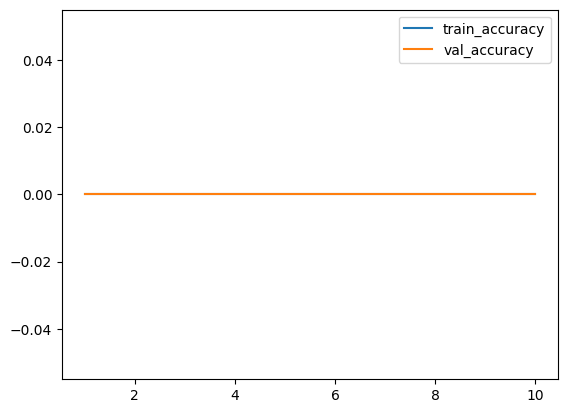

In [37]:
plt.plot(range(1,11),result_df["accuracy"],label="train_accuracy")
plt.plot(range(1,11),result_df["val_accuracy"],label="val_accuracy")
plt.legend()
plt.show()

In [38]:
model.predict(x_test)

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step


array([[0.11677563],
       [0.13770509],
       [0.9482184 ],
       ...,
       [0.6426121 ],
       [0.50992656],
       [0.28153276]], dtype=float32)

In [39]:
model.evaluate (x = x_test, y = y_test)

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.0000e+00 - f1_score: 1.6079 - loss: 4.8903e-07 - precision: 1.0000 - recall: 0.4941


/Users/saro/Desktop/dvdrentaldl/.venv/lib/python3.9/site-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


[4.963839614902099e-07, 1.6127017736434937, 0.0, 1.0, 0.501387357711792]

# Attempting to do better

In [40]:
model1 = Sequential()
# Input layer (match input shape to your data)
model1.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))

# Hidden layers
model1.add(Dense(256, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(16, activation='relu'))


model1.add(Dense(1))

# Compile the model for regression with 'mse' loss function
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError(), MeanAbsoluteError()])

/Users/saro/Desktop/dvdrentaldl/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261,985 (1023.38 KB)

 Trainable params: 261,985 (1023.38 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
result = model1.fit(x_train, y_train, epochs=80, validation_data=(x_test, y_test))


Epoch 1/80
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.4352 - mean_absolute_error: 2.0017 - mean_squared_error: 6.4352 - val_loss: 1.5376 - val_mean_absolute_error: 0.9703 - val_mean_squared_error: 1.5376
Epoch 2/80
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4115 - mean_absolute_error: 0.9047 - mean_squared_error: 1.4115 - val_loss: 1.0397 - val_mean_absolute_error: 0.8301 - val_mean_squared_error: 1.0397
Epoch 3/80
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5775 - mean_absolute_error: 0.5450 - mean_squared_error: 0.5775 - val_loss: 0.7846 - val_mean_absolute_error: 0.6544 - val_mean_squared_error: 0.7846
Epoch 4/80
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4924 - mean_absolute_error: 0.4826 - mean_squared_error: 0.4924 - val_loss: 0.4463 - val_mean_absolute_error: 0.4662 - val_mean_squared_error: 0.4463
Epoch 5/80
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2923 - mean_absolute_error: 0.3547 - mean_squared_error: 0.2923 - val_loss: 0.2779 - val_m

In [43]:
result.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error'])

In [44]:
# Evaluate the model
test_loss = model1.evaluate(x_test, y_test)
print(f'Test Loss (MSE): {test_loss}')

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 0.0117 - mean_absolute_error: 0.0743 - mean_squared_error: 0.0117
Test Loss (MSE): [0.012173503637313843, 0.012173503637313843, 0.07616189867258072]


In [45]:
from sklearn.metrics import r2_score
y_pred = model1.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f'R² score: {r2}')


113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step
R² score: 0.997777658648051


In [46]:
result_df = pd.DataFrame(result.history)
result_df

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
0,4.556769,1.672251,4.556769,1.537558,0.970271,1.537558
1,1.194407,0.822952,1.194407,1.039685,0.830078,1.039685
2,0.521523,0.504752,0.521523,0.784640,0.654374,0.784640
3,0.395579,0.420445,0.395579,0.446331,0.466184,0.446331
4,0.299632,0.359721,0.299632,0.277946,0.302284,0.277946
...,...,...,...,...,...,...
75,0.010596,0.056848,0.010596,0.001905,0.024469,0.001905
76,0.048473,0.096752,0.048473,0.010399,0.057096,0.010399
77,0.010275,0.053046,0.010275,0.018765,0.071754,0.018765
78,0.013644,0.060069,0.013644,0.003674,0.036436,0.003674


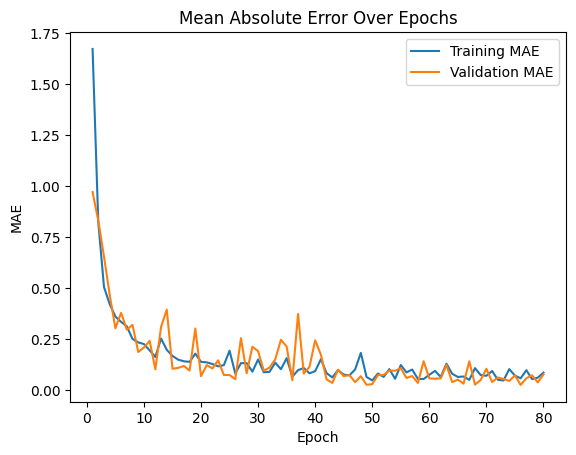

In [47]:
# Plot Mean Absolute Error (MAE) over epochs
plt.plot(range(1, 81), result_df['mean_absolute_error'], label='Training MAE')
plt.plot(range(1, 81), result_df['val_mean_absolute_error'], label='Validation MAE')

plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

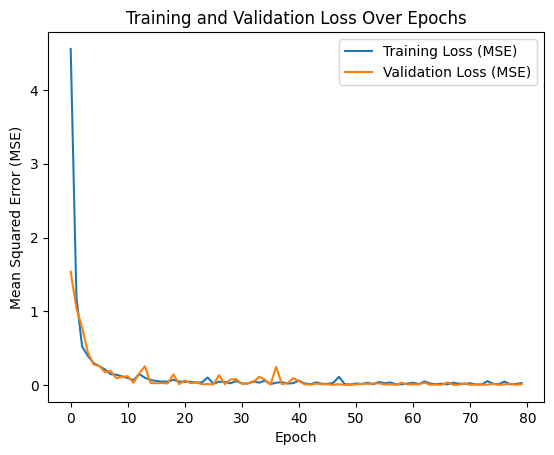

In [48]:
# Plot the training and validation loss
plt.plot(result.history['loss'], label='Training Loss (MSE)')
plt.plot(result.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step


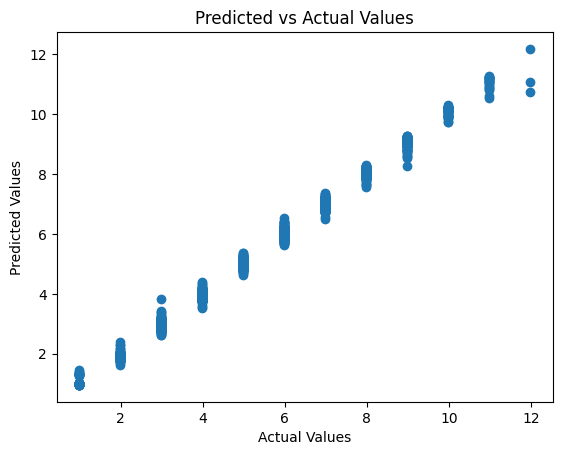

In [49]:
# Get predictions for the test set
y_pred = model1.predict(x_test)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [50]:
# Get predictions for the test set
y_pred = model1.predict(x_test)

# If y_test is a pandas Series, convert it to a NumPy array
if isinstance(y_test, pd.Series):
    y_test = y_test.values

# Flatten y_pred if it's a 2D array
y_pred = y_pred.flatten()

# Calculate residuals (errors)
residuals = y_test - y_pred


113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step


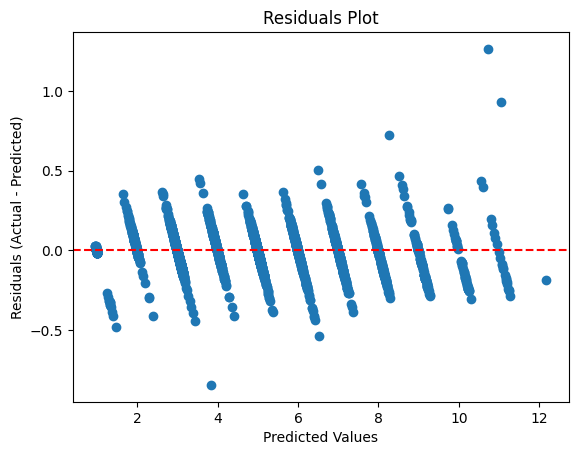

In [51]:
# Plot residuals
plt.scatter(y_pred, residuals)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [52]:
# model = Sequential()
# #input dimension 8 neuron - developer scope
# model.add(Dense(512,input_dim = x_train_scaler_df.shape[1],activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer1
# model.add(Dense(256,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer2
# model.add(Dense(256,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
# model.add(Dense(128,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
# model.add(Dense(128,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
# model.add(Dense(64,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
# model.add(Dense(16,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
# model.add(Dense(16,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3

# model.add(Dense(12,activation="softmax")) #output layer
# model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=[tf.keras.metrics.F1Score(),"accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [53]:
model1.save("DL_Algo.h5")

In [54]:
new_model = load_model("DL_Algo.h5")

In [55]:
first_row = x_test.iloc[0].to_numpy()

In [56]:
first_row

array([ 5,  2, 61,  9,  0, 13,  1,  6, 18,  6, 25])

In [57]:
for x in first_row:
    print(type(x))

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [58]:
new_model.predict(np.array([first_row]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[7.1266055]], dtype=float32)

In [59]:
x_test['rental_month'].value_counts()

rental_month
7    1660
8    1424
6     520
Name: count, dtype: int64

In [60]:
df['length'].min()

46

In [61]:
x_test.columns

Index(['rental_duration', 'rental_rate', 'length', 'replacement_cost',
       'rating', 'category', 'active', 'rental_month', 'rental_day',
       'return_month', 'return_day'],
      dtype='object')

In [62]:
encoders_cont

{'rental_rate': LabelEncoder(), 'replacement_cost': LabelEncoder()}

In [63]:
encoders_cont['replacement_cost'].classes_

array([ 9.99, 10.99, 11.99, 12.99, 13.99, 14.99, 15.99, 16.99, 17.99,
       18.99, 19.99, 20.99, 21.99, 22.99, 23.99, 24.99, 25.99, 26.99,
       27.99, 28.99, 29.99])

In [64]:
array = ['Horror', 'Documentary', 'New', 'Classics', 'Games', 'Sci-Fi',
            'Foreign', 'Family', 'Travel', 'Music', 'Sports', 'Comedy',
            'Drama', 'Action', 'Children', 'Animation']

In [65]:
category = 'Horror'
num = array.index(category)
print(float(num))

0.0
